## Importing the essential libraries over here

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing the dataset over here

In [2]:
data=pd.read_csv("Capsule Hotel Risk Classification Dataset (English Translated) - Sheet1.csv")

In [3]:
data.head()

,Unnamed: 0,content,translated_content,priority_score,problem_domain
0,1,"Sorry, including the expensive price + apk usi...","Sorry, including the expensive price + apk usi...",2,0
1,2,Setelah install terus pas buka aplikasi ngebla...,"After installed, the app stuck with white display",3,1
2,3,"gak bisa submit pada saat verifikasi data, pad...","Cannot submit the data verification, even my i...",3,1
3,4,Aplilasi restart mulu,The app keep restarting,3,1
4,5,"udah mahal , makanan ga enak, banyak lalat","Overpriced, bad food, too many flies",2,0


## Taking care of duplicate observations if present over here

In [4]:
data.duplicated().sum()

0

In [5]:
data.drop_duplicates(inplace=True)

## Taking care of missing values if present over here

In [6]:
data.isnull().sum()

Unnamed: 0            0
content               0
translated_content    0
priority_score        0
problem_domain        0
dtype: int64

In [7]:
missing_values=[feature for feature in data.columns if data[feature].isnull().sum()>1]
for feature in missing_values:
  print(feature)

## Filtering all the numerical features over here

In [8]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [9]:
numerical_features=[feature for feature in data.columns if data[feature].dtype!="O"]
for feature in numerical_features:
  print(feature)

priority_score
problem_domain


In [10]:
data[numerical_features]

,priority_score,problem_domain
0,2,0
1,3,1
2,3,1
3,3,1
4,2,0
...,...,...
695,2,0
696,2,0
697,2,0
698,2,0


## Filtering all the categorical features over here

In [11]:
cat_features=[feature for feature in data.columns if data[feature].dtype=="O"]
for feature in cat_features:
  print(feature)

content
translated_content


In [12]:
data[cat_features]

,content,translated_content
0,"Sorry, including the expensive price + apk usi...","Sorry, including the expensive price + apk usi..."
1,Setelah install terus pas buka aplikasi ngebla...,"After installed, the app stuck with white display"
2,"gak bisa submit pada saat verifikasi data, pad...","Cannot submit the data verification, even my i..."
3,Aplilasi restart mulu,The app keep restarting
4,"udah mahal , makanan ga enak, banyak lalat","Overpriced, bad food, too many flies"
...,...,...
695,Mohon yang bersihin kamar mandi laki2 khusus l...,Please clean the men's bathrooms specifically ...
696,Kurang kedap suara. Kebangun gara2 pod sebelah...,Loading...
697,Would be nice if people could leave luggage af...,Would be nice if people could leave luggage af...
698,Matrasnya ternyata keras bgt\nDiluar itu so fa...,The mattress turned out to be really hard\nApa...


## Encoding the categorical features over here

In [13]:
for feature in cat_features:
  feature_mapping={category:index for index,category in enumerate(data[feature].unique())}
  data[feature]=data[feature].map(feature_mapping)

In [14]:
data

,content,translated_content,priority_score,problem_domain
0,0,0,2,0
1,1,1,3,1
2,2,2,3,1
3,3,3,3,1
4,4,4,2,0
...,...,...,...,...
695,692,405,2,0
696,693,198,2,0
697,694,406,2,0
698,695,407,2,0


## Creating the features and labels over here

In [15]:
X=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

## Splitting the dataset into training set and testing set to avoid the problem of overfitting over here

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

## Training the model on the training set over here

In [24]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.0 MB/s eta 0:00:00


In [25]:
# from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
classifier=CatBoostClassifier()
classifier.fit(X_train,y_train)

Learning rate set to 0.008043
0:	learn: 0.6866982	total: 50.3ms	remaining: 50.3s
1:	learn: 0.6803685	total: 53ms	remaining: 26.4s
2:	learn: 0.6742651	total: 57.2ms	remaining: 19s
3:	learn: 0.6681111	total: 60.8ms	remaining: 15.1s
4:	learn: 0.6620423	total: 63.5ms	remaining: 12.6s
5:	learn: 0.6559586	total: 67.8ms	remaining: 11.2s
6:	learn: 0.6503563	total: 69.8ms	remaining: 9.9s
7:	learn: 0.6440826	total: 72.9ms	remaining: 9.04s
8:	learn: 0.6387280	total: 75ms	remaining: 8.26s
9:	learn: 0.6326531	total: 78.4ms	remaining: 7.76s
10:	learn: 0.6274664	total: 82.7ms	remaining: 7.43s
11:	learn: 0.6219813	total: 86.5ms	remaining: 7.12s
12:	learn: 0.6169316	total: 88.1ms	remaining: 6.69s
13:	learn: 0.6125046	total: 94.3ms	remaining: 6.64s
14:	learn: 0.6069407	total: 99.4ms	remaining: 6.53s
15:	learn: 0.6013802	total: 104ms	remaining: 6.38s
16:	learn: 0.5968605	total: 107ms	remaining: 6.17s
17:	learn: 0.5918011	total: 110ms	remaining: 5.99s
18:	learn: 0.5874920	total: 113ms	remaining: 5.82s
19:

## Evaluating the performance of the model on the testing dataset over here

In [26]:
y_pred=classifier.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


## Displaying the Performance Metrics over here

In [27]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[116   7]
 [  8   9]]


0.8928571428571429

<Axes: >

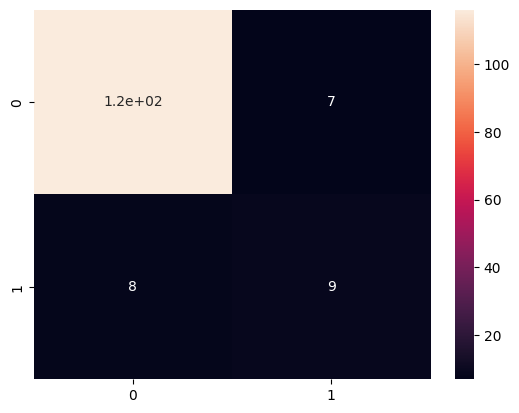

In [28]:
sns.heatmap(cm,annot=True)